# Classification project on star Dataset

In [3]:
# Import Liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,VotingClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

In [4]:
# Import data
df=pd.read_csv("/content/Star3642_balanced.xls")
df.head()

Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass
0  5.99  13.73   0.58  1.318  K5III  16.678352            0
1  8.70   2.31   1.29 -0.045   B1II  15.518060            0
2  5.77   5.50   1.03  0.855  G5III  14.471813            0
3  6.72   5.26   0.74 -0.015    B7V  15.324928            1
4  8.76  13.44   1.16  0.584    G0V  19.401997            1

In [5]:
info = ["Visual Apparent Magnitude of the Star","Distance Between the Star and the Earth","Standard Error of Plx","B-V color index.","Absolute Magnitude of the Star","Whether the Star is Dwarf (0) or Giant (1)]"]


for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

Vmag:			Visual Apparent Magnitude of the Star
Plx:			Distance Between the Star and the Earth
e_Plx:			Standard Error of Plx
B-V:			B-V color index.
SpType:			Absolute Magnitude of the Star
Amag:			Whether the Star is Dwarf (0) or Giant (1)]


In [6]:
df.shape

(3642, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [8]:
df.isna().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

# Visuallization

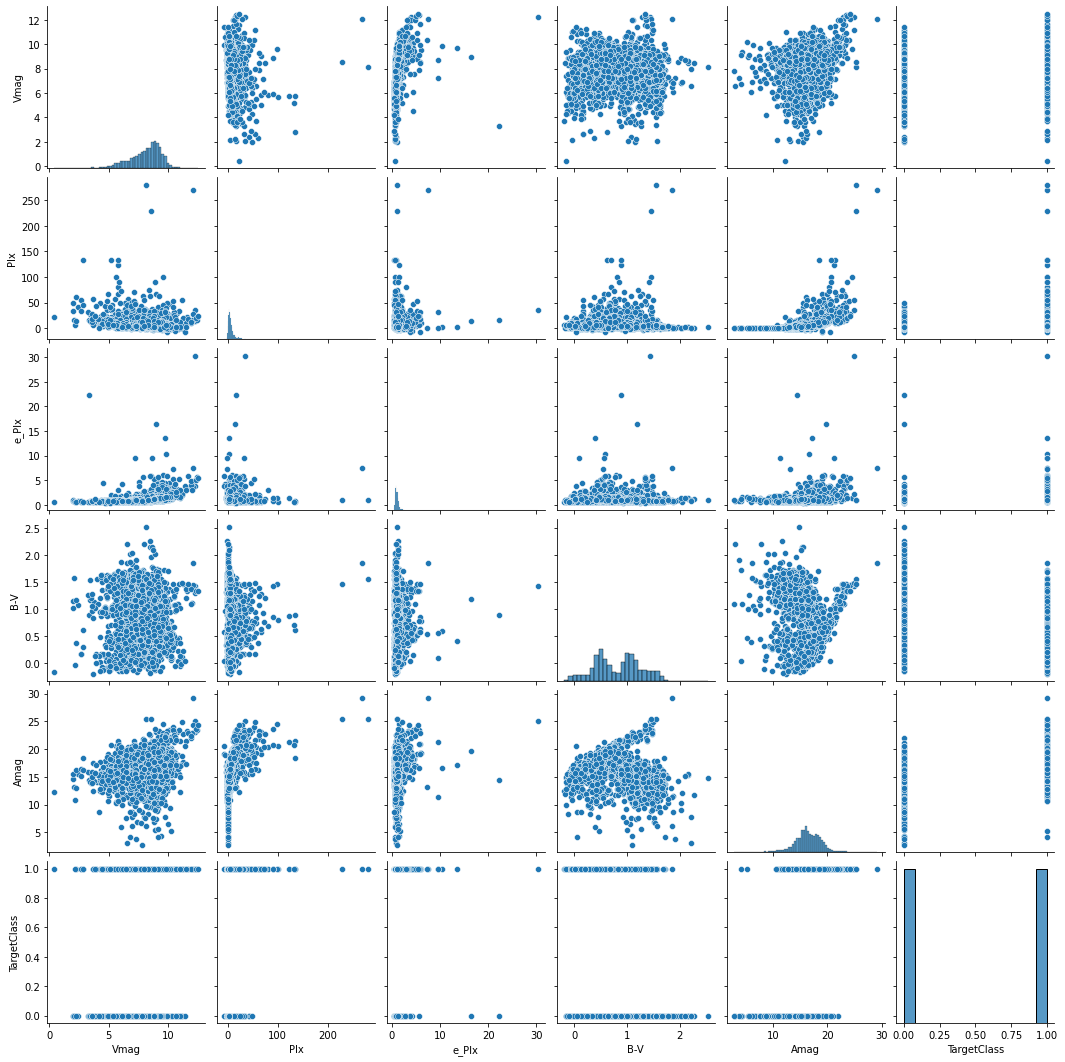

In [9]:
sns.pairplot(data=df)

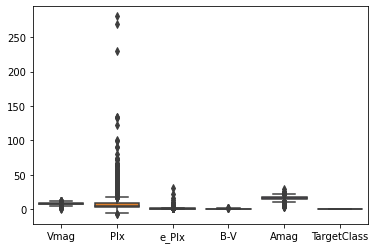

In [10]:
sns.boxplot(data=df)

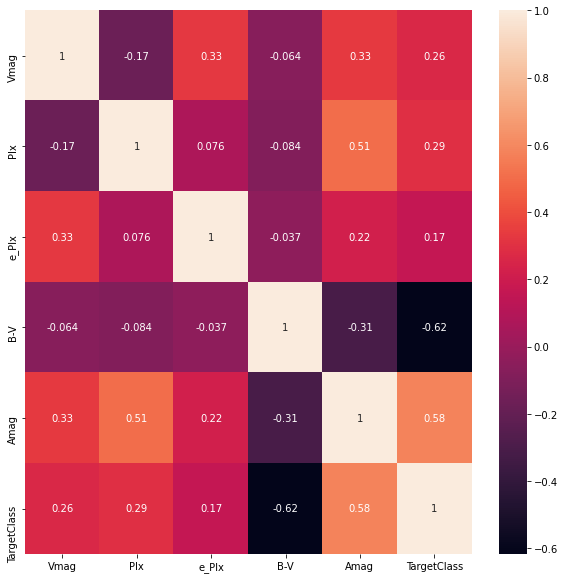

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

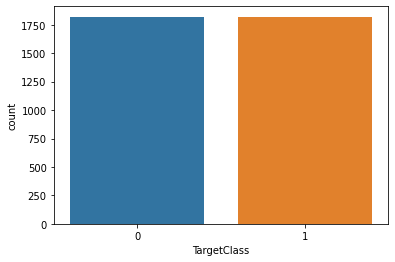

In [12]:
sns.countplot(data=df,x='TargetClass')

AxesSubplot(0.125,0.125;0.775x0.755)


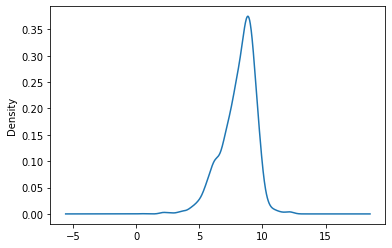

In [13]:
print(df["Vmag"].plot.kde())

AxesSubplot(0.125,0.125;0.775x0.755)


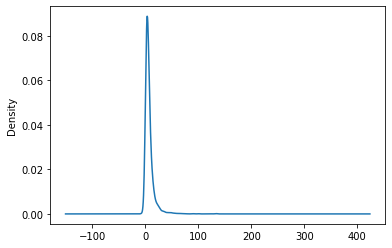

In [14]:
print(df["Plx"].plot.kde())

AxesSubplot(0.125,0.125;0.775x0.755)


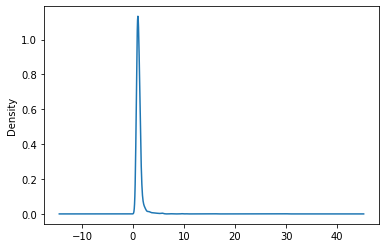

In [15]:
print(df["e_Plx"].plot.kde())

AxesSubplot(0.125,0.125;0.775x0.755)


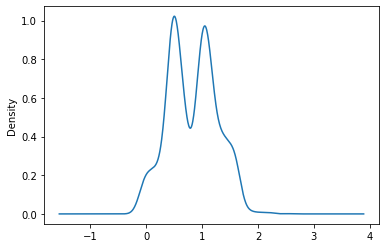

In [16]:
print(df["B-V"].plot.kde())

AxesSubplot(0.125,0.125;0.775x0.755)


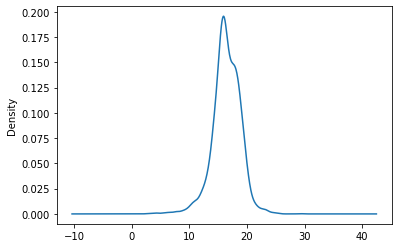

In [17]:
print(df["Amag"].plot.kde())

In [18]:
le=LabelEncoder()
df["SpType"]=le.fit_transform(df["SpType"])

In [19]:
x=df.drop(["TargetClass"],axis=1)
y=df["TargetClass"]

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
#Prepare multiple models
models={"LogisticRegression":LogisticRegression(),"DecisionTreeClassifier":DecisionTreeClassifier(),"SVM":SVC()
        ,"KNN":KNeighborsClassifier(),"GNB":GaussianNB(),"RandomForestClassifier":RandomForestClassifier(),
       "AdaBoostClassifier":AdaBoostClassifier(),"GradientBoostingClassifier":GradientBoostingClassifier(),
       "BaggingClassifier":BaggingClassifier(),"XGBClassifier":XGBClassifier()}

In [22]:
#Function for training the multiple models and generating accuracy¶
#modelAccuracy-> models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        if(scaleFlag==1):
            model_pipeline=Pipeline([("MinMax",MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
            model_pipeline=Pipeline([("standardScaler",StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #model train and prediction
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result


In [23]:
acc=modelAccuracy(models,x,y,0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The Accuracy for  LogisticRegression  is : 0.8930041152263375
The Accuracy for  DecisionTreeClassifier  is : 0.8861454046639232
The Accuracy for  SVM  is : 0.8299039780521262
The Accuracy for  KNN  is : 0.9231824417009602
The Accuracy for  GNB  is : 0.8724279835390947
The Accuracy for  RandomForestClassifier  is : 0.9135802469135802
The Accuracy for  AdaBoostClassifier  is : 0.897119341563786
The Accuracy for  GradientBoostingClassifier  is : 0.9231824417009602
The Accuracy for  BaggingClassifier  is : 0.9218106995884774
The Accuracy for  XGBClassifier  is : 0.9163237311385459


In [24]:
def bestModel(model_result):
    high=0
    for name,acc in model_result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best model is ",model_name," with Accuracy ",high)

In [25]:
acc

{'AdaBoostClassifier': 0.897119341563786,
 'BaggingClassifier': 0.9218106995884774,
 'DecisionTreeClassifier': 0.8861454046639232,
 'GNB': 0.8724279835390947,
 'GradientBoostingClassifier': 0.9231824417009602,
 'KNN': 0.9231824417009602,
 'LogisticRegression': 0.8930041152263375,
 'RandomForestClassifier': 0.9135802469135802,
 'SVM': 0.8299039780521262,
 'XGBClassifier': 0.9163237311385459}

In [26]:
bestModel(acc)

Best model is  KNN  with Accuracy  0.9231824417009602


In [27]:
def bestParameter(model,params,x,y):
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
    grid_cv=GridSearchCV(estimator=model,param_grid=params,cv=cv,scoring="accuracy")
    res=grid_cv.fit(x,y)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)
    

In [28]:
model=KNeighborsClassifier()
params={"n_neighbors":[3,4,5],"weights":['uniform','distance']}
bestParameter(model,params,xtrain,ytrain)

Best Parameters are  {'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy is  0.9358015973889438


In [29]:
#Retraining The model using best parameters
model=XGBClassifier(n_neighbors=3,weights='distance')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.9163237311385459
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       370
           1       0.90      0.93      0.92       359

    accuracy                           0.92       729
   macro avg       0.92      0.92      0.92       729
weighted avg       0.92      0.92      0.92       729



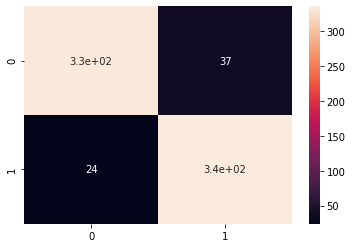

In [30]:
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [31]:
#voting classifier
models=[('lr',LogisticRegression(class_weight='balanced')),('knn',KNeighborsClassifier(n_neighbors=3)),
        ('svm',SVC(probability =True)),('GNB',GaussianNB()),('rf',RandomForestClassifier(n_estimators=100))]

from sklearn.ensemble import VotingClassifier
model=VotingClassifier(estimators=models,voting='hard')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy is : 0.8943758573388203
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       370
           1       0.89      0.90      0.89       359

    accuracy                           0.89       729
   macro avg       0.89      0.89      0.89       729
weighted avg       0.89      0.89      0.89       729



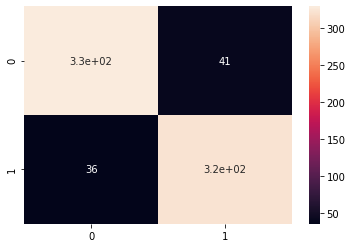

In [32]:
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [33]:
# Stacked classifier
base_models=[('knn',KNeighborsClassifier(n_neighbors=5)),
        ('svm',SVC(probability =True)),('GNB',GaussianNB())
             ,('rf',RandomForestClassifier(n_estimators=100))]
final_model=LogisticRegression()

from sklearn.ensemble import StackingClassifier
model=StackingClassifier(estimators=base_models,final_estimator=final_model)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.9218106995884774
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       370
           1       0.91      0.94      0.92       359

    accuracy                           0.92       729
   macro avg       0.92      0.92      0.92       729
weighted avg       0.92      0.92      0.92       729



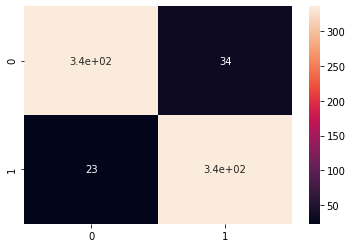

In [34]:
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

# conclusion:
            Best Model is KNeighborsClassifier with Accuracy 93.55%